# 제목을 단어 단위로 분해한 데이터를 집계해 머신러닝 모델에 적용시키기

- 각 뉴스 기사의 제목을 따와 KoNLPy로 분해하기 (단어 단위)
- 각 단어를 하나의 컬럼명으로 지정한 새로운 테이블 word_count_t 생성
    - 각 레코드(행)는 뉴스 기사 하나의 데이터
    - 
- word_count_t의 앞쪽에 각 뉴스 기사의 날짜, 제목 컬럼을 추가

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


## 데이터 읽기

In [3]:
df = pd.read_csv('ml_datas/2023-06-14-10.csv')
print(df.shape)

(120, 6)


## 데이터 형상 파악하기

In [4]:
df.head()


,news_date,news_title,news_text_sm,url_in,news_writer,tags_string
0,2023.06.12 17:51,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",인공지능(AI)이 인간의 일자리를 빼앗을 것이라는 우려 속에서도 AI를 향해 우려보...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#생성형 AI"
1,2023.06.12 12:16,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스인 2023 메타콘(METACON ...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#2023 메타콘,#서울메타위크,#메타버스,#웹 3,#블록체인,#인공지능,#AI,#..."
2,2023.06.12 10:27,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기",안드로이드 어도리티 테크레이더 등 복수 외신은 구글의 차세대 플래그십 스마트폰 픽셀...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#구글,#픽셀 7,#픽셀 8,#픽셀 8 프로,#삼성,#아이소셀 GN2"
3,2023.06.09 16:22,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐...",오픈AI의 인공지능(AI) 기반 챗봇 챗GPT가 인간이 작성한 듯한 자연스러운 대화...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#챗GPT,#AI 논문 작성"
4,2023.06.09 14:42,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시",인공지능(AI) 전문기업 마인즈앤컴퍼니가 AI 전문인재 역량진단 테스트 ‘AI-bi...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#인공지능,#AI,#AI-bility Test,#AI 전문인재 역량진단"


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_date     120 non-null    object
 1   news_title    120 non-null    object
 2   news_text_sm  120 non-null    object
 3   url_in        120 non-null    object
 4   news_writer   120 non-null    object
 5   tags_string   116 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


In [6]:
df.describe()

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string
count,120,120,120,120,120,116
unique,120,120,120,120,6,116
top,2023.06.12 17:51,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",인공지능(AI)이 인간의 일자리를 빼앗을 것이라는 우려 속에서도 AI를 향해 우려보...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#생성형 AI"
freq,1,1,1,1,45,1


In [7]:
df.columns


Index(['news_date', 'news_title', 'news_text_sm', 'url_in', 'news_writer',
       'tags_string'],
      dtype='object')

# KoNLPy로 단어 단위 분해

In [8]:
# datetime(날짜), os 호출

import datetime
import os

# csv 파일로 저장
# 폴더 이름: exc_rate
# 파일 이름: 2023-05-04-시간.csv <= datetime 호출 필요
import csv

# konlpy 호출
from konlpy.tag import Okt




In [9]:
# 저장 경로 생성하기
save_dir = "news_h_words_model/"
os.makedirs(save_dir, exist_ok=True) 


In [10]:

# 각 헤드라인 가져오기
word_list = []

# file_path = 'test_n_practice/ml_datas/2023-06-14-10.csv'
# f = open(file_path, "r", encoding='utf8', header=None, names=['news_date', 'news_title', 'news_text_sm', 'url_in', 'news_writer',
#        'tags_string'])

# 컬럼 'news_title' 가져오기 
rdr = df['news_title'] 

# Okt 객체 선언
okt = Okt()

for w_bundle in rdr:
  print(okt.nouns(w_bundle))
    # 웹, 폰 예외 처리 필요

['보스턴', '컨설팅', '그룹', '기업', '임', '직원', '과반수', '긍정']
['아시아', '최대', '규모', '웹', '메타', '버스', '컨퍼런스', '메타', '콘', '프로그램', '공개']
['구글', '픽셀', '카메라', '스펙', '업그레이드', '하나', '삼성', '아이', '셀', '채택', '전망', '제기']
['캔자스', '대학교', '연구', '팀', '챗', '작성', '논문', '수', '콘텐츠', '탐지', '소프트웨어', '공개']
['마인', '앤', '컴퍼니', '전문', '인력', '역량', '진단', '테스트', '정식', '출시']
['연구', '팀', '중국', '양자컴퓨터', '슈퍼컴퓨터', '대비', '관련', '작업', '처리', '속도', '배']
['아시아', '시장', '대상', '기반', '자동', '캡셔닝', '솔루션', '출시']
['안랩', '자사', '보안', '솔루션', '전용', '플랫폼', '안랩', '출시']
['스', '포스', '마케터', '생', '성형', '사용', '실태', '조사', '결과', '공개', '업무', '시간', '단축', '기대']
['샤오미', '클램셸', '폴', '더블', '폰', '제작', '전망', '제기']
['소문', '무성', '이', '제품', '베일', '애플', '혼합', '현실', '헤드셋', '애플', '프로', '공개']
['애플', '에어팟', '어댑티브', '오디오', '업데이트', '사항', '공개']
['맥', '버전', '맥', '소노마', '베일']
['애플', '울트라', '버전', '맥프로', '인치', '맥북에어', '공개']
['애플', '맥스', '울트라', '칩', '공개']
['파일', '복원', '프로그램', '화질', '개선', '및', '채색', '기능', '출시']
['에이수스', '디자인', '작업', '최적화', '크리에이터', '노트북', '비보', '북', '출시']
['엘립', '암호

## KoNLPy를 사용한 한글 명사 빈도 계산

In [11]:
# konlpy.tag 호출
from konlpy.tag import Okt
# 집계 메소드 호출
from collections import Counter

In [12]:
# okt 객체 생성 후 df의 'news_title' 컬럼 값을 대입하고 계산하기
okt = Okt()

# 컬럼 'news_title' 가져오기 
rdr = df['news_title'] 

# Okt 객체 선언
okt = Okt()

total_noun_l = []
for w in rdr:
  # string 값만 받는 okt.nouns()
  noun_l = okt.nouns(w)
  # print(noun_l)
  
  # 모든 레코드 리스트를 하나의 리스트로 통합하기
  total_noun_l = total_noun_l + noun_l

print(total_noun_l)
    


['보스턴', '컨설팅', '그룹', '기업', '임', '직원', '과반수', '긍정', '아시아', '최대', '규모', '웹', '메타', '버스', '컨퍼런스', '메타', '콘', '프로그램', '공개', '구글', '픽셀', '카메라', '스펙', '업그레이드', '하나', '삼성', '아이', '셀', '채택', '전망', '제기', '캔자스', '대학교', '연구', '팀', '챗', '작성', '논문', '수', '콘텐츠', '탐지', '소프트웨어', '공개', '마인', '앤', '컴퍼니', '전문', '인력', '역량', '진단', '테스트', '정식', '출시', '연구', '팀', '중국', '양자컴퓨터', '슈퍼컴퓨터', '대비', '관련', '작업', '처리', '속도', '배', '아시아', '시장', '대상', '기반', '자동', '캡셔닝', '솔루션', '출시', '안랩', '자사', '보안', '솔루션', '전용', '플랫폼', '안랩', '출시', '스', '포스', '마케터', '생', '성형', '사용', '실태', '조사', '결과', '공개', '업무', '시간', '단축', '기대', '샤오미', '클램셸', '폴', '더블', '폰', '제작', '전망', '제기', '소문', '무성', '이', '제품', '베일', '애플', '혼합', '현실', '헤드셋', '애플', '프로', '공개', '애플', '에어팟', '어댑티브', '오디오', '업데이트', '사항', '공개', '맥', '버전', '맥', '소노마', '베일', '애플', '울트라', '버전', '맥프로', '인치', '맥북에어', '공개', '애플', '맥스', '울트라', '칩', '공개', '파일', '복원', '프로그램', '화질', '개선', '및', '채색', '기능', '출시', '에이수스', '디자인', '작업', '최적화', '크리에이터', '노트북', '비보', '북', '출시', '엘립', '암호', '화폐', '위험', '탐

In [13]:
# Counter에 입력 - 데이터 내 모든 기사 제목들을 구성하는 단어(키워드)들을 한번에 집계
count = Counter(total_noun_l)

# 명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('출시', 32)
('위', 20)
('공개', 19)
('챗', 13)
('애플', 11)
('버전', 11)
('인기', 9)
('코딩', 9)
('언어', 9)
('기능', 8)
('티', 8)
('트렌드', 8)
('프로그래밍', 8)
('순위', 8)
('기업', 7)
('전망', 7)
('제기', 7)
('폰', 7)
('프로', 7)
('및', 7)
('개발', 7)
('배포', 7)
('메타', 6)
('구글', 6)
('기반', 6)
('솔루션', 6)
('샤오미', 6)
('폴', 6)
('더블', 6)
('랭킹', 6)
('베', 6)
('지수', 6)
('채택', 5)
('플랫폼', 5)
('사용', 5)
('용', 5)
('제공', 5)
('기술', 5)
('챗봇', 5)
('서비스', 5)
('지능', 5)
('아이폰', 5)
('스마트폰', 5)
('탑재', 5)
('버스', 4)
('카메라', 4)
('삼성', 4)
('앤', 4)
('테스트', 4)
('울트라', 4)
('노트북', 4)
('툴', 4)
('앱', 4)
('인공', 4)
('시리즈', 4)
('지원', 4)
('대화', 4)
('로', 4)
('신규', 4)
('포함', 4)
('발표', 4)
('가능성', 4)
('픽셀', 3)
('업그레이드', 3)
('아이', 3)
('연구', 3)
('소프트웨어', 3)
('컴퍼니', 3)
('관련', 3)
('안랩', 3)
('업무', 3)
('맥', 3)
('맥스', 3)
('에이수스', 3)
('크리에이터', 3)
('배터리', 3)
('자율', 3)
('주행', 3)
('도입', 3)
('예고', 3)
('전문가', 3)
('차세대', 3)
('베타', 3)
('디스플레이', 3)
('세대', 3)
('종', 3)
('시스템', 3)
('해외', 3)
('스타트업', 3)
('중', 3)
('실시간', 3)
('라이', 3)
('업계', 3)
('로봇', 3)
('등', 3)
('개최', 3)
('컨설팅', 2)


In [14]:
# 한글자인 명사, , 빼기
# total_noun_l : 모든 헤드라인의 단어들을 추출한 1차원 리스트
for i,v in enumerate(total_noun_l):
    if len(v) < 2 and (v != '웹' and v != '앱' and v != '폰' and v != '챗'):
        total_noun_l.pop(i)
    elif v == ',':
        total_noun_l.pop(i)


count = Counter(total_noun_l)

# 명사 빈도 카운트
noun_list2 = count.most_common(100)
for v in noun_list2:
    print(v)

# 해당 튜플 목록을 dict로 바꿔서 하나의 리스트에 저장해 보관하는 등 응용 가능

('출시', 32)
('공개', 19)
('챗', 13)
('애플', 11)
('버전', 11)
('인기', 9)
('코딩', 9)
('언어', 9)
('기능', 8)
('트렌드', 8)
('프로그래밍', 8)
('순위', 8)
('기업', 7)
('전망', 7)
('제기', 7)
('폰', 7)
('프로', 7)
('개발', 7)
('배포', 7)
('메타', 6)
('구글', 6)
('기반', 6)
('솔루션', 6)
('샤오미', 6)
('더블', 6)
('랭킹', 6)
('티', 6)
('지수', 6)
('채택', 5)
('플랫폼', 5)
('사용', 5)
('제공', 5)
('기술', 5)
('챗봇', 5)
('서비스', 5)
('지능', 5)
('아이폰', 5)
('스마트폰', 5)
('탑재', 5)
('버스', 4)
('카메라', 4)
('삼성', 4)
('테스트', 4)
('울트라', 4)
('노트북', 4)
('앱', 4)
('인공', 4)
('시리즈', 4)
('지원', 4)
('대화', 4)
('신규', 4)
('포함', 4)
('발표', 4)
('가능성', 4)
('픽셀', 3)
('업그레이드', 3)
('아이', 3)
('연구', 3)
('소프트웨어', 3)
('컴퍼니', 3)
('관련', 3)
('안랩', 3)
('업무', 3)
('맥스', 3)
('에이수스', 3)
('크리에이터', 3)
('배터리', 3)
('자율', 3)
('주행', 3)
('도입', 3)
('예고', 3)
('전문가', 3)
('차세대', 3)
('베타', 3)
('디스플레이', 3)
('세대', 3)
('시스템', 3)
('해외', 3)
('스타트업', 3)
('실시간', 3)
('라이', 3)
('업계', 3)
('로봇', 3)
('개최', 3)
('컨설팅', 2)
('아시아', 2)
('웹', 2)
('컨퍼런스', 2)
('프로그램', 2)
('하나', 2)
('콘텐츠', 2)
('탐지', 2)
('마인', 2)
('전문', 2)
('인력', 2)
('정식

## 자주 나오는 명사를 알아보기 위해, 단어와 단어 당 count 

In [15]:
# total_noun_l : 해당 기사들의 헤드라인을 구성하는 모든 단어들을 모은 식별자

all_word_df = pd.DataFrame(total_noun_l, columns=['words'])
all_word_df = pd.DataFrame(all_word_df.groupby('words')['words'].count())
all_word_df.rename(columns = {'words': 'cnt'}, inplace=True)
all_word_df.reset_index(inplace=True)

# DESC로 정렬
all_word_df = all_word_df.sort_values(by = 'cnt', ascending=False)
# 다시 index reset, 기존 index 제거 ㅇ
all_word_df.reset_index(drop=True, inplace=True)
all_word_df

,words,cnt
0,출시,32
1,공개,19
2,챗,13
3,애플,11
4,버전,11
...,...,...
549,소노마,1
550,센서,1
551,세트,1
552,세계,1


### 해당 total_noun_l에서 count 값이 5 미만인 단어들 제외시키기


In [16]:
all_word_df.drop(all_word_df[(all_word_df['cnt'] < 5)].index, inplace=True)
all_word_df.shape # 39행 -> 39개의 단어
# word_array = len(all_word_df.index) + 2 (앞의 날짜, 제목 인덱스 고려)

(39, 2)

In [17]:
# 이하 단어들을 컬럼명으로 지정한 후, OHE
# 이후 하나의 레코드 (기사 내 명사 리스트)에서 해당 단어가 포함되었을시 1, 없을시 0
# group by로 집계
import numpy as np   # numpy : 예시데이터의 NaN생성
import pandas as pd   

df.head()

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string
0,2023.06.12 17:51,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",인공지능(AI)이 인간의 일자리를 빼앗을 것이라는 우려 속에서도 AI를 향해 우려보...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#생성형 AI"
1,2023.06.12 12:16,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스인 2023 메타콘(METACON ...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#2023 메타콘,#서울메타위크,#메타버스,#웹 3,#블록체인,#인공지능,#AI,#..."
2,2023.06.12 10:27,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기",안드로이드 어도리티 테크레이더 등 복수 외신은 구글의 차세대 플래그십 스마트폰 픽셀...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#구글,#픽셀 7,#픽셀 8,#픽셀 8 프로,#삼성,#아이소셀 GN2"
3,2023.06.09 16:22,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐...",오픈AI의 인공지능(AI) 기반 챗봇 챗GPT가 인간이 작성한 듯한 자연스러운 대화...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#챗GPT,#AI 논문 작성"
4,2023.06.09 14:42,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시",인공지능(AI) 전문기업 마인즈앤컴퍼니가 AI 전문인재 역량진단 테스트 ‘AI-bi...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#인공지능,#AI,#AI-bility Test,#AI 전문인재 역량진단"


In [18]:
# df의 news_date에서 '날짜 시간'에서 시간을 제거하기
df['news_date'] = pd.to_datetime(df['news_date']) # datetime dtype으로 변환
df['news_date']

0     2023-06-12 17:51:00
1     2023-06-12 12:16:00
2     2023-06-12 10:27:00
3     2023-06-09 16:22:00
4     2023-06-09 14:42:00
              ...        
115   2023-04-18 12:52:00
116   2023-04-18 12:48:00
117   2023-04-18 12:47:00
118   2023-04-18 10:31:00
119   2023-04-17 11:44:00
Name: news_date, Length: 120, dtype: datetime64[ns]

In [19]:
df['news_date'] = df['news_date'].dt.strftime('%Y.%m.%d')
# 한번 실행하면 다시 실행할시 오류

In [20]:
df['news_date']


0      2023.06.12
1      2023.06.12
2      2023.06.12
3      2023.06.09
4      2023.06.09
          ...    
115    2023.04.18
116    2023.04.18
117    2023.04.18
118    2023.04.18
119    2023.04.17
Name: news_date, Length: 120, dtype: object

In [21]:
df

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string
0,2023.06.12,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",인공지능(AI)이 인간의 일자리를 빼앗을 것이라는 우려 속에서도 AI를 향해 우려보...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#생성형 AI"
1,2023.06.12,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스인 2023 메타콘(METACON ...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#2023 메타콘,#서울메타위크,#메타버스,#웹 3,#블록체인,#인공지능,#AI,#..."
2,2023.06.12,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기",안드로이드 어도리티 테크레이더 등 복수 외신은 구글의 차세대 플래그십 스마트폰 픽셀...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#구글,#픽셀 7,#픽셀 8,#픽셀 8 프로,#삼성,#아이소셀 GN2"
3,2023.06.09,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐...",오픈AI의 인공지능(AI) 기반 챗봇 챗GPT가 인간이 작성한 듯한 자연스러운 대화...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#인공지능,#AI,#챗GPT,#AI 논문 작성"
4,2023.06.09,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시",인공지능(AI) 전문기업 마인즈앤컴퍼니가 AI 전문인재 역량진단 테스트 ‘AI-bi...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#인공지능,#AI,#AI-bility Test,#AI 전문인재 역량진단"
...,...,...,...,...,...,...
115,2023.04.18,"앤시스-모라이, KADF2023 개최…자율주행 및 시뮬레이션 관련 최신 기술 및 산...",글로벌 엔지니어링 시뮬레이션 선도 기업인 앤시스코리아(대표 문석환)는 오늘 자율주행...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#앤시스코리아,#모라이,#KADF 2023,#자율주행"
116,2023.04.18,"'AI 기반 챗봇 어시스턴트' 구축, 개발자 세계서 대세로 우뚝…외신이 주목한 앱은?",오픈AI(OpenAI)의 챗GPT(ChatGPT) 출시를 시작으로 GPT-4와 앤트...,https://www.cwn.kr/news/articleView.html?idxno...,최은희,"#오픈AI,#GPT-4,#대규모 언어 모델,#AI,#인공지능,#AI 챗봇,#쇼트 서..."
117,2023.04.18,"[코딩 트렌드] R, 4월 PyPL 인기 프로그래밍 언어 랭킹 7위...티오베 지수...",PyPL 순위프로그래밍 언어 R이 4월 PyPL(PYPL PopularitY of ...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,"#R,#코딩,#프로그래밍,#프로그래밍 언어"
118,2023.04.18,"화웨이, 7000mAh 배터리 탑재한 스마트폰 '엔조이 60X' 출시",출처: Huawei17일(현지 시각) 화웨이가 신형 스마트폰 '엔조이 60X(Enj...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#화웨이,#엔조이 60X,#스마트폰"


In [22]:
# 전체 열 개수 세기
df_date_n_title = df.loc[:, ['news_date', 'news_title']]
df_date_n_title

,news_date,news_title
0,2023.06.12,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다"""
1,2023.06.12,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개
2,2023.06.12,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기"
3,2023.06.09,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐..."
4,2023.06.09,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시"
...,...,...
115,2023.04.18,"앤시스-모라이, KADF2023 개최…자율주행 및 시뮬레이션 관련 최신 기술 및 산..."
116,2023.04.18,"'AI 기반 챗봇 어시스턴트' 구축, 개발자 세계서 대세로 우뚝…외신이 주목한 앱은?"
117,2023.04.18,"[코딩 트렌드] R, 4월 PyPL 인기 프로그래밍 언어 랭킹 7위...티오베 지수..."
118,2023.04.18,"화웨이, 7000mAh 배터리 탑재한 스마트폰 '엔조이 60X' 출시"


In [23]:
# df_date_n_title.iloc[:, 0]
# 단어들을 리스트화 한 뒤, 이를 위의 df_date_n_title 데이터프레임에 합치기
w_list = all_word_df['words'].to_list()
# df_date_n_title[['salary','news']] = 0
# df_date_n_title.drop(labels=['salary','news'], axis=1, inplace=True)

## 각 행을 뉴스 기사의 날짜 및 제목 테이블하고 합치기
- 기사의 날짜와 제목이 단어 컬럼들 앞쪽에 붙어야 한다.

In [24]:
# 컬럼 추가
df_date_n_title[w_list] = 0
df_date_n_title

,news_date,news_title,출시,공개,챗,애플,버전,인기,언어,코딩,...,채택,챗봇,기술,서비스,탑재,제공,사용,플랫폼,스마트폰,지능
0,2023.06.12,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023.06.12,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023.06.12,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023.06.09,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023.06.09,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023.04.18,"앤시스-모라이, KADF2023 개최…자율주행 및 시뮬레이션 관련 최신 기술 및 산...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,2023.04.18,"'AI 기반 챗봇 어시스턴트' 구축, 개발자 세계서 대세로 우뚝…외신이 주목한 앱은?",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,2023.04.18,"[코딩 트렌드] R, 4월 PyPL 인기 프로그래밍 언어 랭킹 7위...티오베 지수...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,2023.04.18,"화웨이, 7000mAh 배터리 탑재한 스마트폰 '엔조이 60X' 출시",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# word_array = len(all_word_df.index) + 2
# 각 단어 컬럼 df_date_n_title.iloc[:, 3:word_array]

In [26]:
# 오차 : 하나의 헤드라인에 같은 단어가 복수 언급될 경우 집계가 실상과 다를 수 있다
# (하나의 기사 제목에 단어가 여러번 언급되어도 중요도는 똑같이 1이기 때문)

In [27]:
# konlpy.tag 호출
from konlpy.tag import Okt
# 집계 메소드 호출
from collections import Counter

In [28]:
# 컬럼 'news_title' 가져오기 
rdr = df_date_n_title['news_title'] 

# Okt 객체 선언
okt = Okt()

# 단어 컬럼 리스트: w_list
i = 0
for w_bundle in rdr:
  w_l = okt.nouns(w_bundle)
  # if 문으로 해당 리스트가 설정된 단어들
  for w in w_l:
    if w in w_list:
        # print('포함')
        df_date_n_title.loc[i, w] = 1
    else:
        # print('미포함')
        pass
  # print("-"*50)
  i += 1


In [29]:
df_date_n_title

,news_date,news_title,출시,공개,챗,애플,버전,인기,언어,코딩,...,채택,챗봇,기술,서비스,탑재,제공,사용,플랫폼,스마트폰,지능
0,2023.06.12,"보스턴 컨설팅 그룹 ""기업 임직원 과반수, AI 긍정적으로 본다""",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023.06.12,아시아 최대 규모 웹 3.0 X 메타버스 컨퍼런스 ‘2023 메타콘’ 프로그램 공개,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023.06.12,"구글 픽셀 8, 카메라 스펙 업그레이드하나?...삼성 아이소셀 GN2 채택 전망 제기",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2023.06.09,"캔자스대학교 연구팀 ""챗GPT가 작성한 논문 99% 잡아낼 수 있어""...AI 콘텐...",0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023.06.09,"마인즈앤컴퍼니, AI 전문 인력 역량진단 테스트 ‘AI-bility Test’ 정식 출시",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023.04.18,"앤시스-모라이, KADF2023 개최…자율주행 및 시뮬레이션 관련 최신 기술 및 산...",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
116,2023.04.18,"'AI 기반 챗봇 어시스턴트' 구축, 개발자 세계서 대세로 우뚝…외신이 주목한 앱은?",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117,2023.04.18,"[코딩 트렌드] R, 4월 PyPL 인기 프로그래밍 언어 랭킹 7위...티오베 지수...",0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
118,2023.04.18,"화웨이, 7000mAh 배터리 탑재한 스마트폰 '엔조이 60X' 출시",1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
df_date_n_title.drop(labels=['news_title'], axis=1, inplace=True)

In [31]:
df_date_n_title

,news_date,출시,공개,챗,애플,버전,인기,언어,코딩,순위,...,채택,챗봇,기술,서비스,탑재,제공,사용,플랫폼,스마트폰,지능
0,2023.06.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023.06.12,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023.06.12,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2023.06.09,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023.06.09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023.04.18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
116,2023.04.18,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117,2023.04.18,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
118,2023.04.18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
df_date_n_title.news_date = pd.to_datetime(df_date_n_title.news_date)
df_date_n_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   news_date  120 non-null    datetime64[ns]
 1   출시         120 non-null    int64         
 2   공개         120 non-null    int64         
 3   챗          120 non-null    int64         
 4   애플         120 non-null    int64         
 5   버전         120 non-null    int64         
 6   인기         120 non-null    int64         
 7   언어         120 non-null    int64         
 8   코딩         120 non-null    int64         
 9   순위         120 non-null    int64         
 10  프로그래밍      120 non-null    int64         
 11  트렌드        120 non-null    int64         
 12  기능         120 non-null    int64         
 13  개발         120 non-null    int64         
 14  전망         120 non-null    int64         
 15  제기         120 non-null    int64         
 16  폰          120 non-null    int64         
 1

In [33]:
# df_date_n_title = pd.DataFrame(df_date_n_title.groupby('words')['words'].count())
# 

In [34]:
resampled = df_date_n_title.resample(rule='1M', on='news_date').agg(np.sum)
# resampled.sort_values(by=['news_date'], ascending=False)

resampled = resampled.reset_index()
resampled

,news_date,출시,공개,챗,애플,버전,인기,언어,코딩,순위,...,채택,챗봇,기술,서비스,탑재,제공,사용,플랫폼,스마트폰,지능
0,2023-04-30,6,4,4,3,5,6,6,6,6,...,0,2,1,1,4,1,0,0,3,1
1,2023-05-31,18,8,4,3,4,3,2,3,2,...,3,2,3,3,1,2,2,4,2,4
2,2023-06-30,8,7,4,4,2,0,0,0,0,...,2,1,1,1,0,2,3,1,0,0


In [35]:
type(resampled)

pandas.core.frame.DataFrame

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 날짜별로 특정 단어의 빈도수 확인
# X = resampled.index
# y = resampled['출시']
# y2 = resampled['공개']
# plt.figure(figsize = (60, 12)) # 전체 figure 크기
# plt.plot(resampled) # 그래프 시각화

# # 값 시각화
# for i, v in enumerate(X):
#     plt.text(v, y[i], y[i],
#              fontsize = 12, 
#              color = 'blue',
#              horizontalalignment ='center',
#              verticalalignment = 'bottom')
#     plt.text(v, y2[i], y2[i],
#              fontsize = 12, 
#              color = 'red',
#              horizontalalignment ='center',
#              verticalalignment = 'bottom')
# plt.xticks(X, fontsize = 12, rotation = 15) # x축
# plt.yticks(fontsize = 12) # y축 눈금
# plt.xlabel('Time', fontsize = 20) # x축 이름
# plt.ylabel('CNT', fontsize = 20) # y축 이름

In [78]:
resampled_sampled = resampled.resample(rule='1M', on='news_date').agg(np.sum)
resampled_sampled

,출시,공개,챗,애플,버전,인기,언어,코딩,순위,프로그래밍,...,채택,챗봇,기술,서비스,탑재,제공,사용,플랫폼,스마트폰,지능
news_date,,,,,,,,,,,,,,,,,,,,,
2023-04-30,6,4,4,3,5,6,6,6,6,6,...,0,2,1,1,4,1,0,0,3,1
2023-05-31,18,8,4,3,4,3,2,3,2,2,...,3,2,3,3,1,2,2,4,2,4
2023-06-30,8,7,4,4,2,0,0,0,0,0,...,2,1,1,1,0,2,3,1,0,0


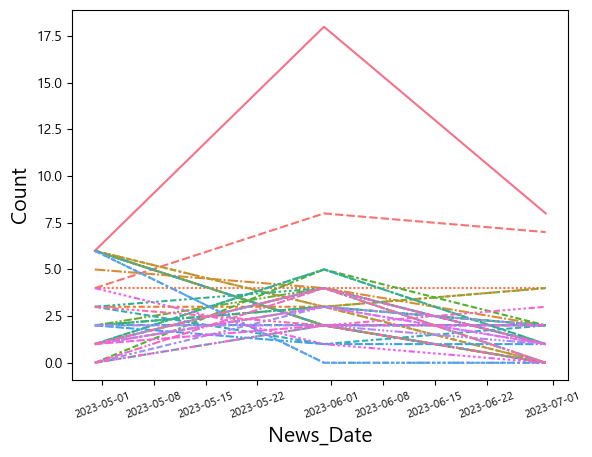

In [80]:
sns.lineplot(data=resampled_sampled).get_legend().remove()

plt.xticks(fontsize = 8, rotation = 20) # x축
plt.xlabel('News_Date', fontsize = 15) # x축 이름
plt.ylabel('Count', fontsize = 15) # y축 이름

plt.show()

In [42]:
resampled.news_date

0   2023-04-30
1   2023-05-31
2   2023-06-30
Name: news_date, dtype: datetime64[ns]

In [43]:
# 날짜별 단어들의 집계수 - bar plot 
plt.rcParams['font.family'] = 'Malgun Gothic'



In [44]:
resampled_d = resampled.drop(labels=['news_date'], axis=1)
col_names = resampled_d.columns
col_names

Index(['출시', '공개', '챗', '애플', '버전', '인기', '언어', '코딩', '순위', '프로그래밍', '트렌드',
       '기능', '개발', '전망', '제기', '폰', '기업', '배포', '프로', '구글', '메타', '기반', '티',
       '랭킹', '솔루션', '더블', '샤오미', '지수', '아이폰', '채택', '챗봇', '기술', '서비스', '탑재',
       '제공', '사용', '플랫폼', '스마트폰', '지능'],
      dtype='object')

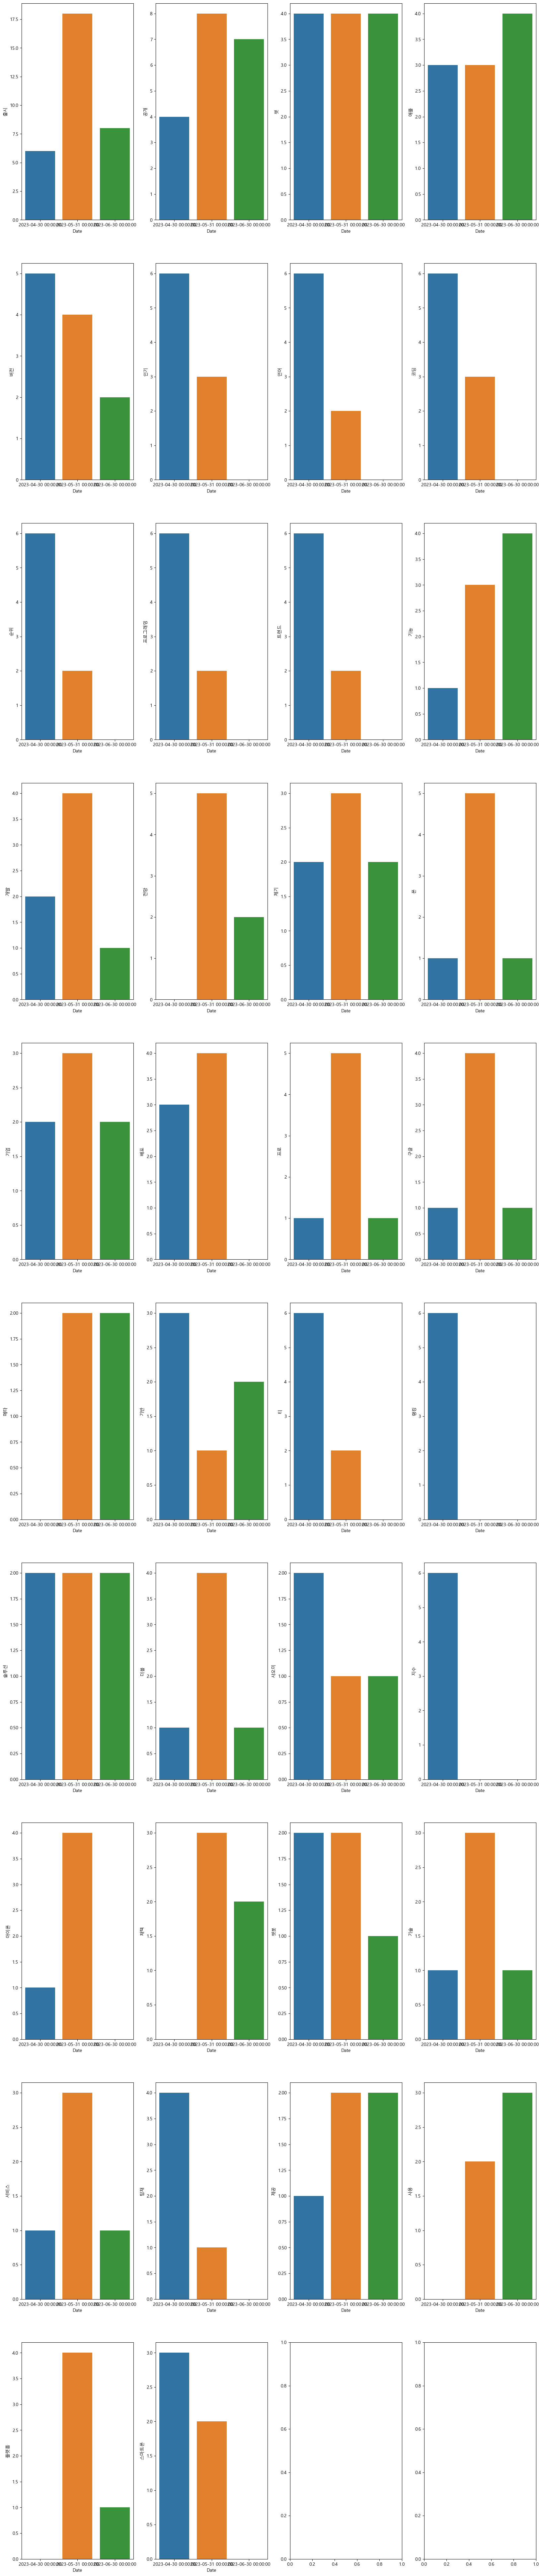

In [45]:
# 각 feature와 target 간의 분포와 관계 살펴보기
target = resampled['news_date']

figure, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 100))
for i in range(len(col_names)-1):
    # ax.scatter(x축_data, y축_)
    fig = sns.barplot(data=resampled, x=target, y=col_names[i], ax = axes[i // 4, i % 4])
    fig.set_xlabel("Date")
    fig.set_ylabel(col_names[i])

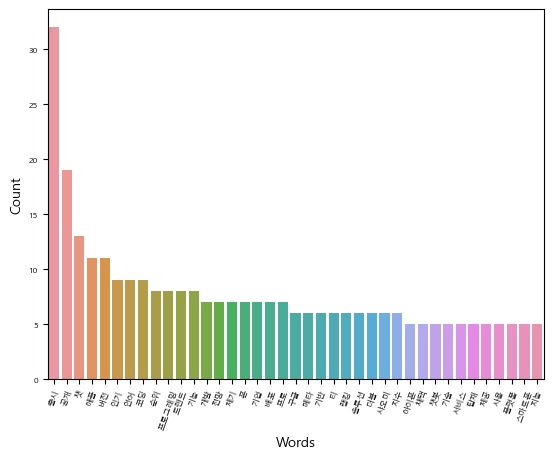

In [56]:
# 해당 기간 동안 각 단어 집계
target = all_word_df['cnt']

fig = sns.barplot(data=all_word_df, x=all_word_df["words"], y=target)
fig.set_xticklabels(fig.get_xticklabels(),rotation = 70)
fig.set_xlabel("Words")
fig.set_ylabel("Count")
plt.tick_params(axis='both', labelsize=6)
# all_word_df